Epoch 1/10
2100/2100 [==============================] - 16s 8ms/step - loss: 0.8799 - accuracy: 0.7460 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
2100/2100 [==============================] - 5s 3ms/step - loss: 0.3586 - accuracy: 0.8962 - val_loss: 0.3187 - val_accuracy: 0.9069
Epoch 3/10
2100/2100 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.9150 - val_loss: 0.2827 - val_accuracy: 0.9161
Epoch 4/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2612 - accuracy: 0.9251 - val_loss: 0.2490 - val_accuracy: 0.9277
Epoch 5/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2365 - accuracy: 0.9330 - val_loss: 0.2352 - val_accuracy: 0.9331
Epoch 6/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2184 - accuracy: 0.9368 - val_loss: 0.2193 - val_accuracy: 0.9361
Epoch 7/10
2100/2100 [==============================] - 5s 3ms/step - loss: 0.2038 - accuracy: 0.9410 - val_loss: 0.2169 - val_

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


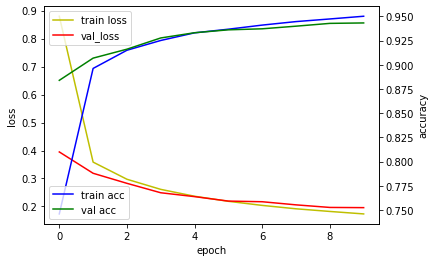

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋. 학습 데이터셋 60000개와 테스트 데이터셋 10000개를 다운로드 한 후 넘파이 배열 형태로 가져옴
# x_train에는 60000장의 숫자 이미지(28*28 픽셀), y_train에는 라벨링된 실제 숫자값이 들어감
# x_test와 y_test에도 동일한 형태임

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#픽셀값의 범위가 0~255 사이로, 0~1로 정규화 해주자.

x_train, x_test = x_train / 255.0, x_test / 255.0

# 데이터셋을 섞고 배치 만들기
# 학습용 데이터셋과 검증용 데이터셋을 7:3 비율로 나누어 사용.
# 배치 사이즈는 학습 시 샘플 수를 의미하고, 배치 사이즈가 작을수록 가중치 갱신이 자주 일어남.

ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000)
train_size = int(len(x_train) * 0.7)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# 입력층 1개, 은닉층 2개, 출력층 1개로 구성된 간단한 심층 신경망
# Sequential(), 순차 모델을 이용해 모델을 만듬
# Flatten() 계층을 이용했는데, Flatten은 28*28 크기의 2차원 이미지를 1차원으로 평면화시킴. 따라서 신경망 뉴런이 784개가 됨.
# 다음 2개의 은닉층은 출력크기가 20, 활성화 함수로 Dense
# 마지막 출력층은 Softmax를 사용하는데, 0~9까지 총 10개의 값으로 판별하므로 출력층 크기는 10
# 입력층을 제외하면 굳이 입력 크기를 지정하지 않는데, 케라스에서 이전 층의 출력 개수로 자동 계산하기 때문.

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 손실함수 'sparse_categorical_crossentropy'
# 보통 3개 이상으로 구별하는 다중 클래스 분류 문제는 활성화 함수로 softmax, 손실 함수로 'sparse_categorical_crossentropy' 이용

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# epochs가 너무 클 경우 오버피팅이 일어날 가능성이 있으므로, 적당한 값 사용하자

hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

model.evaluate(x_test, y_test)

model.summary()

model.save('mnist_model.h5')

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
10000/1 - 1s - loss: 0.1155 - accuracy: 0.9455
예측값 :  [9]


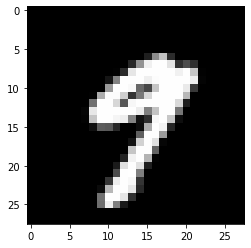

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

#데이터 가져와서 정규화. 이미 학습된 모델이므로 테스트셋만 사용하자
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0

# 모델을 가져와 객체로 반환함.
model = load_model('mnist_model.h5')
model.summary()

model.evaluate(x_test, y_test, verbose=2)

plt.imshow(x_test[20], cmap='gray')

picks = [20]
predict = model.predict_classes(x_test[picks])
print("예측값 : ",predict)

## 챗봇 문답 데이터 감정 분류 모델 구현

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

data = pd.read_csv('ChatbotData.csv', delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

# 텍스트를 단어 리스트로 변경
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
#text.Tokenizer()를 이용해 문장 내 모든 단어를 시퀸스 번호로 변경.
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

print(sequences)
# 하면 알겠지만, 문장의 길이가 제각각이기 때문에 벡터의 크기가 다 다르다.
# CNN 모델의 입력 계층이 고정된 개수의 입력 노드를 가지고 있으므로, 나머지 부분을 0으로 패딩 처리해야함.

#여기에서는 최대 단어 개수 15로 잡는다.
MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')
#padding='post'는 0을 뒤에서부터 채우는 옵션

#학습용, 검정용, 테스트용 데이터셋을 7, 2, 1 비율로 나눈다.

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size+val_size).take(test_size).batch(20)

dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1

# 단어 임베딩 코드 영역

# 입력 계층
input_layer = Input(shape=(MAX_SEQ_LEN,))

# 임베딩 계층. 단어의 개수(VOCAB_SIZE), 밀집 벡터의 크기(EMB_SIZE), 입력되는 시퀸스 벡터의 크기(MAX_SEQ_LEN)
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)

# 과적합 문제를 해결하기 위함이라는 dropout
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

# 임베딩 계층에서 전달된 임베딩 벡터에서 특징 추출을 하는 영역을 구현한다.
# Conv1D()를 이용해 크기가 3, 4, 5인 합성곱 필터를 128개씩 사용한 합성곱 계층을 3개 생성
# GlobalMaxPool1D()를 이용해 최대 풀링 연산을 수행함. 이후 완전 연결 계층을 통해 클래스 분류작업을 하는데, concatenate()
# 를 이용해 각 특징맵 결과를 하나로 묶어줌.

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

# 다음은 마지막 단계인 완전 연결 계층. 기본적인 심층 신경망을 사용함
# 출력 Dense 계층은 출력 노드가 3개(3개로 분류하니까). 신경망이 예측하는 최종 단계이므로 활성화 함수를 사용하지 않음
# 결과인 logit을 점수라고 부름. 3개의 점수가 출력되는데, 가장 큰 점수를 가진 노드 위치가 CNN 모델이 예측한 결과(class)가 됨

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)

# 출력 노드인 logits에서 나온 점수를 소프트맥스 계층을 통해 감정 클래스별 확률 계산
# 실제에서는 그냥 가장 점수가 큰 클래스를 선택. 여기서는 softmax 연산 결과가 필요해서 추가함
# 클래스 분류모델에서 주로 loss를 계산하는 함수로 sparse_categorical_crossentropy를 사용하는데, 여기서 확률값을 입력으로 사용

predictions = Dense(3, activation=tf.nn.softmax)(logits)

# 이제 위에서 정의한 계층들을 케라스 모델에 추가해야함.
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# verbose=1이면 학습 과정을 상세히 보여줌
# epoch를 5로, 즉 5번 학습
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

loss, accuracy = model.evaluate(test_ds, verbose=1)
print('Accuracy: %f' %(accuracy))
print('loss: %f' %(loss))

model.save('cnn_model.h5')